In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [2]:
# setting difference to be 4

df = pd.read_csv(r'C:\Users\masud\Documents\Steel-Project\Final_4.5.csv')
df.head()

,Unnamed: 0,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,...,al,ma,b,n,ti,cr,va,mo,difference,constriction
0,0,396378,1,K371,10003,101,1302.1,1147,921,4.36,...,304,291,1,34,6,302,0,25,-0.783333,0
1,1,396376,3,K371,10123,101,1282.3,1150,920,4.37,...,395,384,1,33,12,189,25,7,-0.300000,0
2,2,396377,4,K321,10040,102,1297.4,1183,933,4.43,...,476,463,1,20,11,288,0,40,-1.866667,0
3,3,396379,3,K371,10243,102,1295.2,1165,910,4.44,...,306,296,1,21,9,253,0,9,-0.166667,0
4,4,396380,4,K321,10012,100,1293.3,1192,909,3.95,...,340,329,1,28,8,297,0,23,-0.800000,0


In [3]:
# drop column
df = df.drop(['Unnamed: 0','Thickness profile','difference'], axis = 1)

#df

In [4]:
df = df.loc[df.Hardness_1 * df.Hardness_2 * df.Width * df.Thickness * df['Temperature before finishing mill'] * df['Temperature after finishing mill'] != 0]


In [5]:
# Downsampling 

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler


In [6]:
df.columns

Index(['coil', 'furnace Number', 'analyse', 'Hardness_1', 'Hardness_2',
       'Width', 'Temperature before finishing mill',
       'Temperature after finishing mill', 'Thickness', 'c', 'mn', 'si', 'nb',
       'p', 's', 'al', 'ma', 'b', 'n', 'ti', 'cr', 'va', 'mo', 'constriction'],
      dtype='object')

In [23]:
#Extracting independent variable
X= df.iloc[:,4:-1].values
X

array([[ 101. , 1302.1, 1147. , ...,  302. ,    0. ,   25. ],
       [ 101. , 1282.3, 1150. , ...,  189. ,   25. ,    7. ],
       [ 102. , 1297.4, 1183. , ...,  288. ,    0. ,   40. ],
       ...,
       [  99. , 1257.2, 1182. , ...,  248. ,    0. ,   36. ],
       [  99. , 1257.1, 1194. , ...,  248. ,    0. ,   36. ],
       [  99. , 1258. , 1178. , ...,  248. ,    0. ,   36. ]])

In [24]:
#Extracting dependent variable
y= df.iloc[:,-1].values 
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [11]:
#For splitting the dataset, 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)  

In [12]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train,  y_train)
# summarize class distribution
print(Counter(y_over))

Counter({0: 3831, 1: 3831})


In [13]:
# feature scaling:standarding the dataset

from sklearn.preprocessing import StandardScaler 

# fitting  and transforming the training dataset.

st_x= StandardScaler()  
X_over= st_x.fit_transform(X_over)

In [14]:
# fitting  and transforming the test dataset
X_test= st_x.transform(X_test)

In [15]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_over = scaler.fit_transform(X_over)
X_test = scaler.transform(X_test)

In [17]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier

# define pipeline
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.778


# Random Forest 


In [25]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier

# define pipeline
steps = [('under', RandomUnderSampler()), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.810


# Feature importance 


In [30]:
pipeline.feature_importances_

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [28]:
feature_importances = pd.DataFrame(steps.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances  

AttributeError: 'list' object has no attribute 'feature_importances_'

In [19]:
# Random Forest (Ensemble Learning III)

from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
model_rf = rf.fit(X_over, y_over)
print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))

pred_rf = model_rf.predict(X_test)

score on test: 0.7962507962507962
score on train: 0.08717808717808717


C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


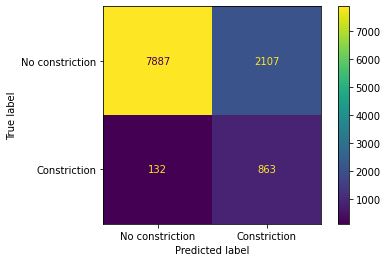

In [21]:
from sklearn import metrics

metrics.plot_confusion_matrix(model_rf, X_test, y_test, display_labels=['No constriction', 'Constriction'])

In [22]:
print(metrics.classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      9994
           1       0.29      0.87      0.44       995

    accuracy                           0.80     10989
   macro avg       0.64      0.83      0.66     10989
weighted avg       0.92      0.80      0.84     10989

